In [ ]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np
import os
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



In [ ]:
data_dir = pathlib.Path("/content/drive/MyDrive/Dataset_balanced/ds_train")
print(data_dir)
data_teste = pathlib.Path("/content/drive/MyDrive/Dataset_balanced/ds_test")
print(data_teste)

/content/drive/MyDrive/Dataset_balanced/ds_train
/content/drive/MyDrive/Dataset_balanced/ds_test


In [ ]:
np.random.seed(1000)

image_shape = 227
batch_size = 64
AlexNet = Sequential()

# Primeira camada convolucional
AlexNet.add(Conv2D(filters=96, input_shape=(image_shape, image_shape, 3), kernel_size=(11, 11), strides=(4, 4), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Segunda camada convolucional
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Terceira camada convolucional
AlexNet.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))

# Quarta camada convolucional
AlexNet.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))

# Quinta camada convolucional
AlexNet.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Camadas densas
AlexNet.add(Flatten())
AlexNet.add(Dense(4096))
AlexNet.add(Activation('relu'))

AlexNet.add(Dense(4096))
AlexNet.add(Activation('relu'))

AlexNet.add(Dense(1000))
AlexNet.add(Activation('relu'))

# Camada de saída
AlexNet.add(Dense(5))
AlexNet.add(Activation('softmax'))

# Resumo do modelo
AlexNet.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 57, 57, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 57, 57, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 29, 29, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 29, 29, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 29, 29, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 15, 15, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 15, 15, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 15, 15, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 15, 15, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 15, 15, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      67,112,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1000)                │       4,097,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │           5,005 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 91,743,477 (349.97 MB)

 Trainable params: 91,743,477 (349.97 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    label_mode="categorical",
    image_size=(image_shape, image_shape),
    batch_size=batch_size
    )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(image_shape,image_shape),
    batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_teste,
    seed=123,
    label_mode="categorical",
    image_size=(image_shape,image_shape),
    batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 5855 files belonging to 5 classes.
Using 5270 files for training.
Found 5855 files belonging to 5 classes.
Using 585 files for validation.
Found 650 files belonging to 5 classes.
['basal_cell_carcinoma', 'melanoma', 'nevus', 'seborrheic_keratosis', 'squamous_cell_carcinoma']


In [ ]:
for image_batch, labels_batch in train_ds:
  train_img = image_batch
  train_labels = labels_batch
  break
for image_batch, labels_batch in val_ds:
  val_img = image_batch
  val_labels = labels_batch
  break
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  test_img = image_batch
  test_labels = labels_batch
  break

(64, 227, 227, 3)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
epochs = 50



history = AlexNet.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
    )

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 53s 226ms/step - accuracy: 0.2216 - loss: 289.0029 - val_accuracy: 0.3111 - val_loss: 1.5668
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2424 - loss: 1.6064 - val_accuracy: 0.2051 - val_loss: 1.5762
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2342 - loss: 1.5652 - val_accuracy: 0.2376 - val_loss: 1.5435
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2531 - loss: 1.5534 - val_accuracy: 0.2393 - val_loss: 1.5382
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2520 - loss: 1.5389 - val_accuracy: 0.2462 - val_loss: 1.5197
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2491 - loss: 1.5260 - val_accuracy: 0.2462 - val_loss: 1.5120
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2671 - loss: 1.5239 - val_accuracy: 0.2923 - val_loss: 1.5202
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2411 - loss: 1.7138 - val_accuracy: 0.3111

In [ ]:
loss, acc = AlexNet.evaluate(test_ds)
print("Accuracy", acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 678ms/step - accuracy: 0.2409 - loss: 1.7594
Accuracy 0.26461538672447205


In [ ]:
# prompt: print the classification report
import numpy as np
from sklearn.metrics import classification_report


# Get predictions for the test set
y_pred = AlexNet.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true = tf.concat([y for x, y in test_ds], axis=0).numpy()
# Convert y_true to class indices
y_true_classes = np.argmax(y_true, axis=1)

# Print the classification report
print(classification_report(y_true_classes, y_pred_classes))


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step
              precision    recall  f1-score   support

           0       0.33      0.56      0.42       130
           1       0.23      0.59      0.34       130
           2       0.29      0.15      0.19       130
           3       0.00      0.00      0.00       130
           4       0.14      0.02      0.04       130

    accuracy                           0.26       650
   macro avg       0.20      0.26      0.20       650
weighted avg       0.20      0.26      0.20       650



In [ ]:
y_pred=np.argmax(AlexNet.predict(test_img), axis=-1)

# Convert test_labels to class indices
test_labels = np.argmax(test_labels, axis=1)

con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step  


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


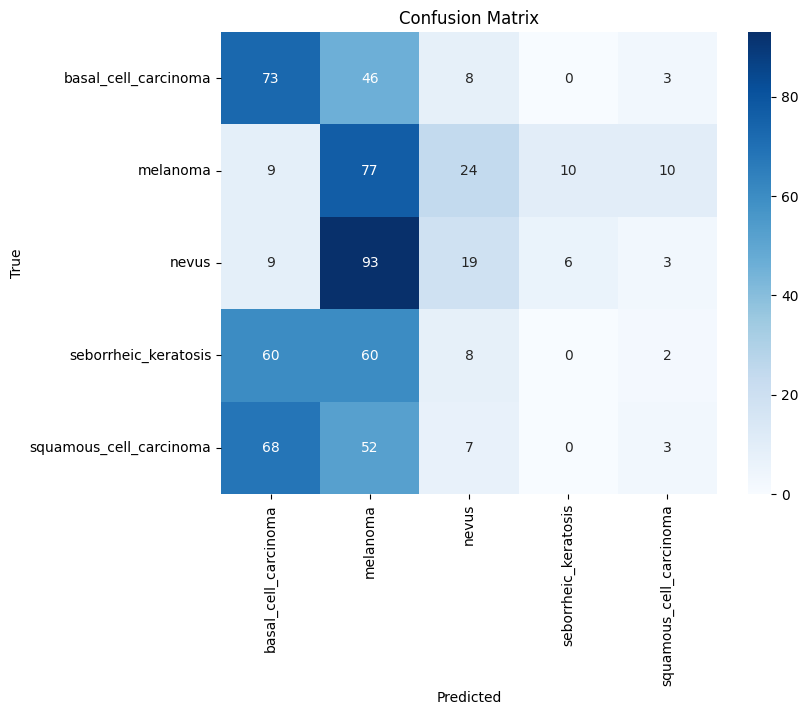

In [ ]:
# prompt: imprima a matriz confusao do modelo acima

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for the test set
y_pred = AlexNet.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the test set
y_true = tf.concat([y for x, y in test_ds], axis=0).numpy()
y_true_classes = np.argmax(y_true, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


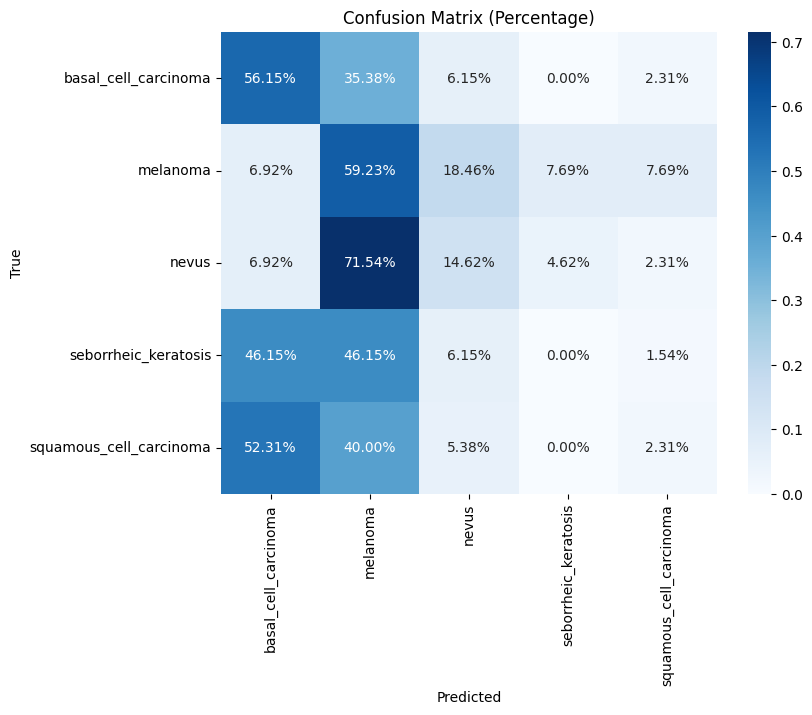

In [ ]:
# prompt: gere uma matriz de confusão do treinamento acima mas com porcentagem

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions for the test set
y_pred = AlexNet.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the test set
y_true = tf.concat([y for x, y in test_ds], axis=0).numpy()
y_true_classes = np.argmax(y_true, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Normalize the confusion matrix to get percentages
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix using seaborn with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, fmt=".2%", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentage)')
plt.show()
